In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import torch 
from torch import nn, optim

from jcopdl.callback import Callback, set_config

device = torch.device("cpu")
# device = torch.device("cuda:0" torch.cuda.is_available() else "cpu")
device

device(type='cpu')

## Dataset and Dataloader

In [5]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [6]:
bs = 64

transform = transforms.Compose([
    transforms.Grayscale(),
    transforms.ToTensor()
])

train_set = datasets.ImageFolder('data/train/', transform=transform)
trainloader = DataLoader(train_set, batch_size=bs, shuffle=True, num_workers=0)

test_set = datasets.ImageFolder('data/test/', transform=transform)
testloader = DataLoader(test_set, batch_size=bs, shuffle=True)

## Arsitektur & config 

In [7]:
from jcopdl.layers import linear_block

In [8]:
class AutoEncoder(nn.Module):
    def __init__(self, z_size):
        super().__init__()
        
        self.encode = nn.Sequential(
            linear_block(784, 512, batch_norm=True),
            linear_block(512, 256, batch_norm=True),
            linear_block(256, z_size, activation='sigmoid') # bounded terbatas
        )
        
        self.decode = nn.Sequential(
            linear_block(z_size, 256, batch_norm=True),
            linear_block(256, 512, batch_norm=True),
            linear_block(512, 784, activation='sigmoid') # wajib pakai sigmoid untuk decode karena output image. gambar 0 sampai 1
        )
    
    def forward(self, x):
        x = self.encode(x)
        x = self.decode(x)
        return x

In [9]:
config = set_config({
    "z_size":32,
    "batch_size":bs
})

## Training Preparation -> MCOC

In [ ]:
model = AutoEncoder(config.z_size).to(device)
criterion = nn.BCELoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001)
callback = Callback(model, config, outdir='model/ae')

# Training 

### Fitur nya sendiri adalah target 

In [11]:
from tqdm.auto import tqdm

def loop_fn(mode, dataset, dataloader, model, criterion, optimizer, device):
    if mode == "train":
        model.train()
    elif mode == "test":
        model.eval()
    cost = 0
    for feature, _ in tqdm(dataloader, desc=mode.title()):
        feature = feature.view(-1, 784).to(device)
        output = model(feature)
        loss = criterion(output, feature)
        
        if mode == "train":
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        cost += loss.item() * feature.shape[0]
    cost = cost / len(dataset)
    return cost

Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch     1
Train_cost  = 0.3333 | Test_cost  = 0.2674 | 


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch     2
Train_cost  = 0.1836 | Test_cost  = 0.1742 | 


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch     3
Train_cost  = 0.1591 | Test_cost  = 0.1521 | 


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch     4
Train_cost  = 0.1447 | Test_cost  = 0.1401 | 


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch     5
Train_cost  = 0.1349 | Test_cost  = 0.1329 | 


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch     6
Train_cost  = 0.1275 | Test_cost  = 0.1279 | 


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch     7
Train_cost  = 0.1222 | Test_cost  = 0.1232 | 


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch     8
Train_cost  = 0.1168 | Test_cost  = 0.1198 | 


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch     9
Train_cost  = 0.1138 | Test_cost  = 0.1173 | 


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch    10
Train_cost  = 0.1106 | Test_cost  = 0.1149 | 


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch    11
Train_cost  = 0.1070 | Test_cost  = 0.1122 | 


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch    12
Train_cost  = 0.1049 | Test_cost  = 0.1110 | 


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch    13
Train_cost  = 0.1029 | Test_cost  = 0.1096 | 


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch    14
Train_cost  = 0.1007 | Test_cost  = 0.1075 | 


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch    15
Train_cost  = 0.0990 | Test_cost  = 0.1067 | 


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch    16
Train_cost  = 0.0968 | Test_cost  = 0.1060 | 


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch    17
Train_cost  = 0.0957 | Test_cost  = 0.1048 | 


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch    18
Train_cost  = 0.0945 | Test_cost  = 0.1041 | 


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch    19
Train_cost  = 0.0933 | Test_cost  = 0.1030 | 


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch    20
Train_cost  = 0.0924 | Test_cost  = 0.1026 | 


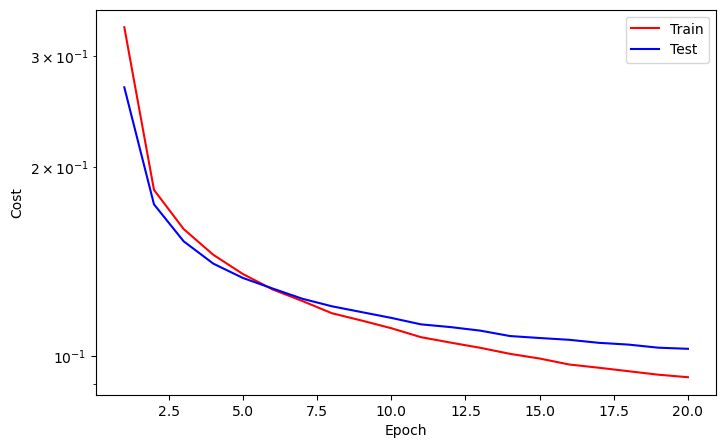

Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch    21
Train_cost  = 0.0908 | Test_cost  = 0.1028 | 
==> EarlyStop patience =  1 | Best test_cost: 0.1026


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch    22
Train_cost  = 0.0899 | Test_cost  = 0.1019 | 


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch    23
Train_cost  = 0.0891 | Test_cost  = 0.1015 | 


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch    24
Train_cost  = 0.0888 | Test_cost  = 0.1012 | 


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch    25
Train_cost  = 0.0873 | Test_cost  = 0.1005 | 


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch    26
Train_cost  = 0.0866 | Test_cost  = 0.1005 | 


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch    27
Train_cost  = 0.0863 | Test_cost  = 0.1004 | 


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch    28
Train_cost  = 0.0861 | Test_cost  = 0.0999 | 


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch    29
Train_cost  = 0.0860 | Test_cost  = 0.1002 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0999


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch    30
Train_cost  = 0.0853 | Test_cost  = 0.1002 | 
==> EarlyStop patience =  2 | Best test_cost: 0.0999


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch    31
Train_cost  = 0.0843 | Test_cost  = 0.0993 | 


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch    32
Train_cost  = 0.0842 | Test_cost  = 0.0990 | 


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch    33
Train_cost  = 0.0829 | Test_cost  = 0.0984 | 


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch    34
Train_cost  = 0.0824 | Test_cost  = 0.0982 | 


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch    35
Train_cost  = 0.0829 | Test_cost  = 0.0986 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0982


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch    36
Train_cost  = 0.0826 | Test_cost  = 0.0989 | 
==> EarlyStop patience =  2 | Best test_cost: 0.0982


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch    37
Train_cost  = 0.0818 | Test_cost  = 0.0981 | 


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch    38
Train_cost  = 0.0816 | Test_cost  = 0.0982 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0981


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch    39
Train_cost  = 0.0811 | Test_cost  = 0.0976 | 


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch    40
Train_cost  = 0.0809 | Test_cost  = 0.0983 | 


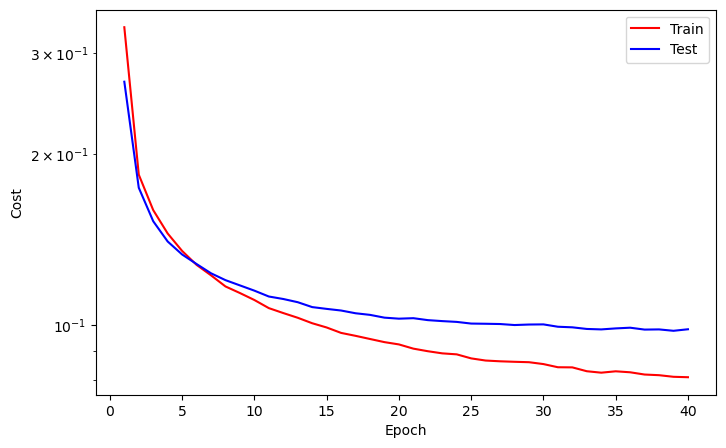

==> EarlyStop patience =  1 | Best test_cost: 0.0976


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch    41
Train_cost  = 0.0802 | Test_cost  = 0.0981 | 
==> EarlyStop patience =  2 | Best test_cost: 0.0976


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch    42
Train_cost  = 0.0805 | Test_cost  = 0.0984 | 
==> EarlyStop patience =  3 | Best test_cost: 0.0976


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch    43
Train_cost  = 0.0794 | Test_cost  = 0.0980 | 
==> EarlyStop patience =  4 | Best test_cost: 0.0976


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch    44
Train_cost  = 0.0796 | Test_cost  = 0.0982 | 
==> EarlyStop patience =  5 | Best test_cost: 0.0976
==> Execute Early Stopping at epoch: 44 | Best test_cost: 0.0976
==> Best model is saved at model/ae


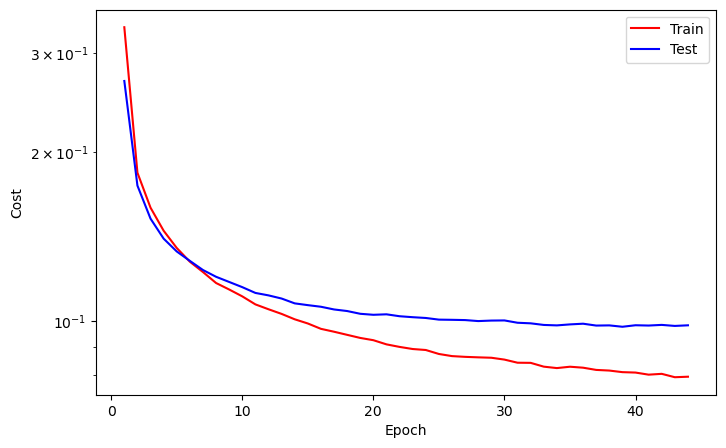

In [12]:
while True:
    train_cost = loop_fn("train", train_set, trainloader, model, criterion, optimizer, device)
    with torch.no_grad():
        test_cost = loop_fn("test", test_set, testloader, model, criterion, optimizer, device)
    
    # Logging
    callback.log(train_cost, test_cost)

    # Checkpoint
    callback.save_checkpoint()
        
    # Runtime Plotting
    callback.cost_runtime_plotting()
    
    # Early Stopping
    if callback.early_stopping(model, monitor="test_cost"):
        callback.plot_cost()
        break

# Evaluate

In [13]:
feature, target = next(iter(testloader))
feature = feature.view(-1, 784).to(device)

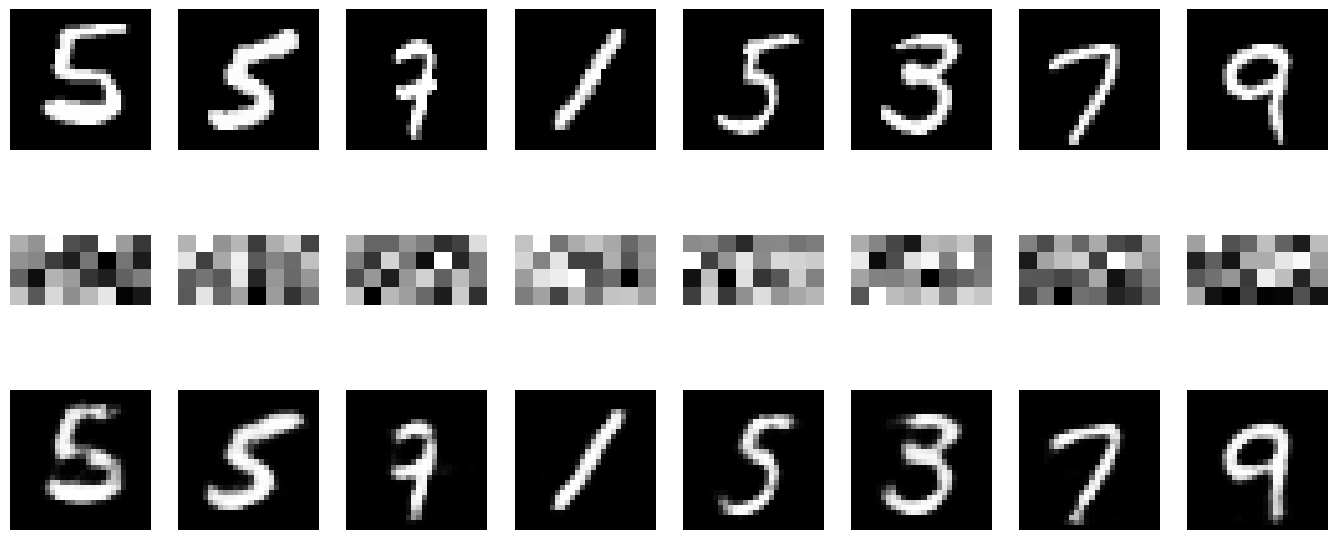

In [14]:
with torch.no_grad():
    model.eval()
    enc = model.encode(feature)
    dec = model.decode(enc)

fig, ax = plt.subplots(3, 8, figsize=(17, 7))
for i in range(8):
    ax[0, i].imshow(feature[i].view(28, 28).cpu(), cmap='gray')
    ax[0, i].axis('off')
    
    ax[1, i].imshow(enc[i].view(4, 8).cpu(), cmap='gray')
    ax[1, i].axis('off')
    
    ax[2, i].imshow(dec[i].view(28, 28).cpu(), cmap='gray')
    ax[2, i].axis('off')

## Playground 

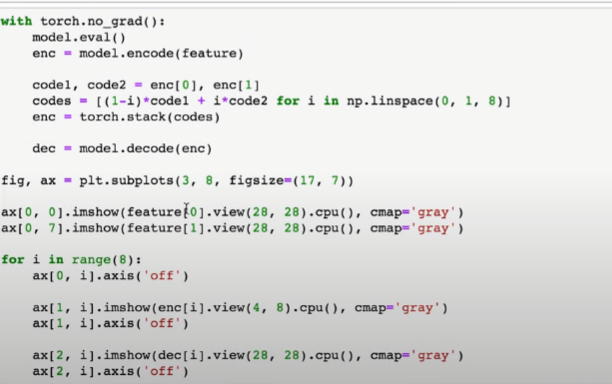

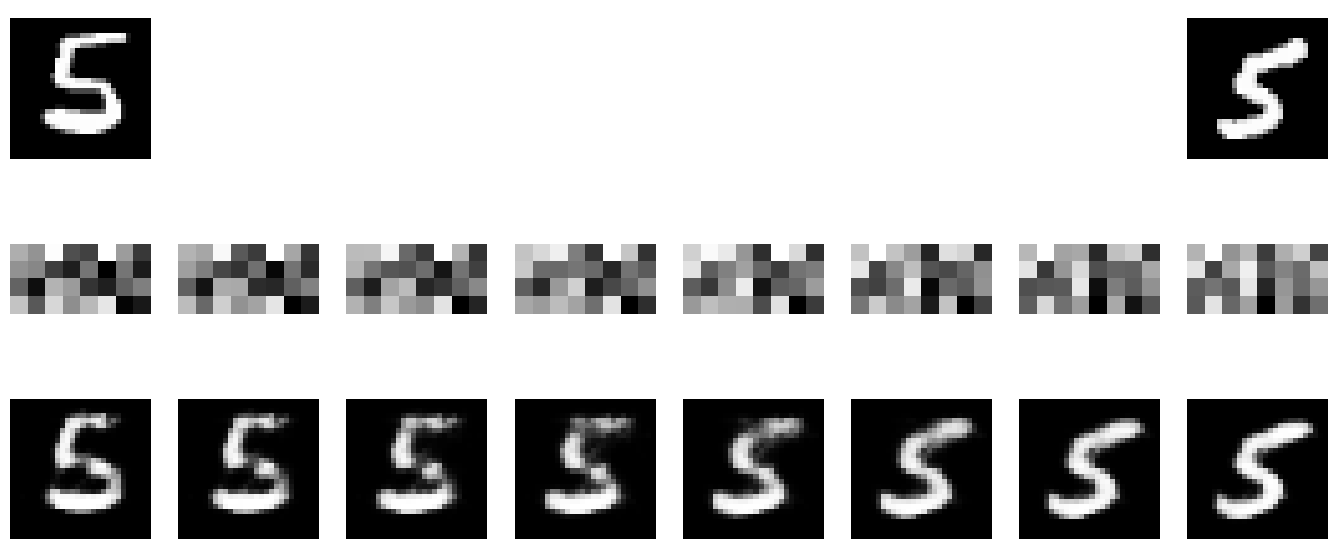

In [16]:
with torch.no_grad():
    model.eval()
    enc = model.encode(feature)
    
    code1, code2 = enc[0], enc[1]
    codes = [(1-i)*code1 + i*code2 for i in np.linspace(0, 1, 8)]
    enc = torch.stack(codes)
    
    dec = model.decode(enc)

fig, ax = plt.subplots(3, 8, figsize=(17, 7))

ax[0, 0].imshow(feature[0].view(28, 28).cpu(), cmap='gray')
ax[0, 7].imshow(feature[1].view(28, 28).cpu(), cmap='gray')

for i in range(8):
    ax[0, i].axis('off')
    
    ax[1, i].imshow(enc[i].view(4, 8).cpu(), cmap='gray')
    ax[1, i].axis('off')
    
    ax[2, i].imshow(dec[i].view(28, 28).cpu(), cmap='gray')
    ax[2, i].axis('off')

## Denoising AutoEncoder 

bisa jadi buat aplikasi penghilang jerawat

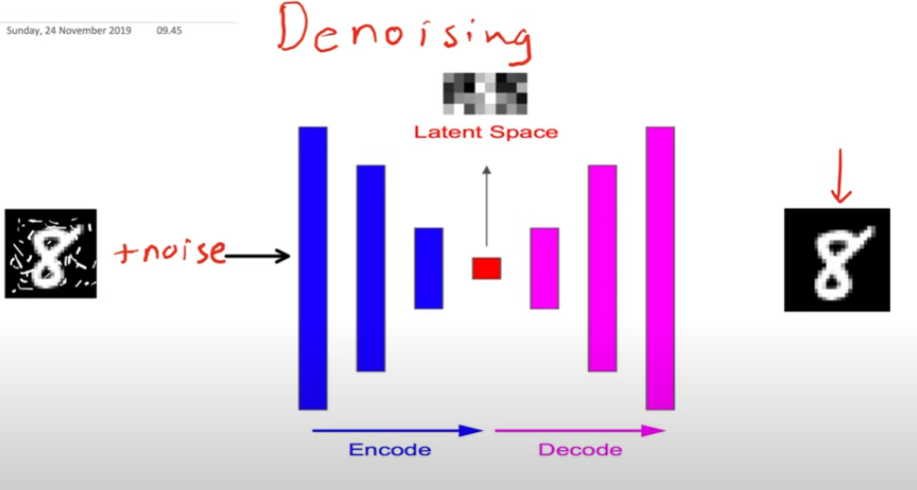

In [17]:
def add_noise(images, noise_factor=0.5): #tambahkan noise
    images = torch.clone(images) #duplikat image
    images += noise_factor * torch.rand_like(images) # random number yang seukuran dengan image dan ditambahkan noise
    images = images.clamp(0., 1.) #dibatasi 0 sampai satu
    return images

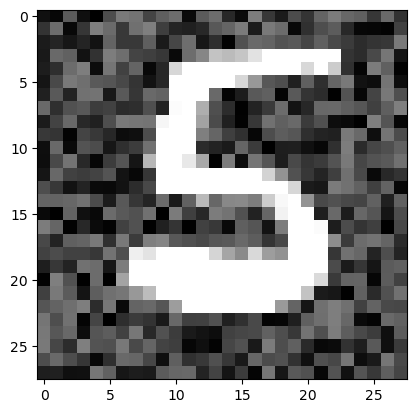

In [21]:
plt.imshow(add_noise(feature[0]).view(28, 28).cpu(), cmap='gray')

# Training Preparation -> MCOC

In [22]:
model = AutoEncoder(config.z_size).to(device)
criterion = nn.BCELoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001)
callback = Callback(model, config, outdir='model/dae')

# Training

## inputnya ditambah noise, targetnya tetap bersih

In [23]:
from tqdm.auto import tqdm

def loop_fn(mode, dataset, dataloader, model, criterion, optimizer, device):
    if mode == "train":
        model.train()
    elif mode == "test":
        model.eval()
    cost = 0
    for feature, _ in tqdm(dataloader, desc=mode.title()):
        feature = feature.view(-1, 784).to(device)
        output = model(add_noise(feature))
        loss = criterion(output, feature)
        
        if mode == "train":
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        cost += loss.item() * feature.shape[0]
    cost = cost / len(dataset)
    return cost

Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch     1
Train_cost  = 0.3375 | Test_cost  = 0.2661 | 


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch     2
Train_cost  = 0.1856 | Test_cost  = 0.1758 | 


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch     3
Train_cost  = 0.1616 | Test_cost  = 0.1554 | 


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch     4
Train_cost  = 0.1484 | Test_cost  = 0.1448 | 


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch     5
Train_cost  = 0.1398 | Test_cost  = 0.1386 | 


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch     6
Train_cost  = 0.1323 | Test_cost  = 0.1320 | 


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch     7
Train_cost  = 0.1269 | Test_cost  = 0.1279 | 


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch     8
Train_cost  = 0.1222 | Test_cost  = 0.1247 | 


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch     9
Train_cost  = 0.1185 | Test_cost  = 0.1219 | 


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch    10
Train_cost  = 0.1149 | Test_cost  = 0.1186 | 


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch    11
Train_cost  = 0.1116 | Test_cost  = 0.1172 | 


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch    12
Train_cost  = 0.1097 | Test_cost  = 0.1165 | 


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch    13
Train_cost  = 0.1077 | Test_cost  = 0.1152 | 


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch    14
Train_cost  = 0.1064 | Test_cost  = 0.1133 | 


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch    15
Train_cost  = 0.1047 | Test_cost  = 0.1126 | 


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch    16
Train_cost  = 0.1033 | Test_cost  = 0.1105 | 


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch    17
Train_cost  = 0.1017 | Test_cost  = 0.1101 | 


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch    18
Train_cost  = 0.1006 | Test_cost  = 0.1092 | 


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch    19
Train_cost  = 0.0994 | Test_cost  = 0.1090 | 


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch    20
Train_cost  = 0.0985 | Test_cost  = 0.1085 | 


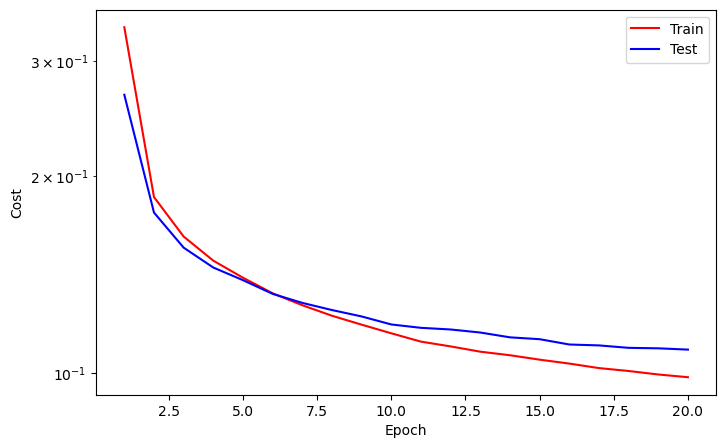

Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch    21
Train_cost  = 0.0971 | Test_cost  = 0.1088 | 
==> EarlyStop patience =  1 | Best test_cost: 0.1085


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch    22
Train_cost  = 0.0963 | Test_cost  = 0.1068 | 


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch    23
Train_cost  = 0.0957 | Test_cost  = 0.1075 | 
==> EarlyStop patience =  1 | Best test_cost: 0.1068


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch    24
Train_cost  = 0.0951 | Test_cost  = 0.1068 | 
==> EarlyStop patience =  2 | Best test_cost: 0.1068


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch    25
Train_cost  = 0.0940 | Test_cost  = 0.1062 | 


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch    26
Train_cost  = 0.0931 | Test_cost  = 0.1061 | 


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch    27
Train_cost  = 0.0924 | Test_cost  = 0.1051 | 


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch    28
Train_cost  = 0.0922 | Test_cost  = 0.1048 | 


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch    29
Train_cost  = 0.0913 | Test_cost  = 0.1044 | 


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch    30
Train_cost  = 0.0905 | Test_cost  = 0.1043 | 


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch    31
Train_cost  = 0.0904 | Test_cost  = 0.1043 | 


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch    32
Train_cost  = 0.0895 | Test_cost  = 0.1041 | 


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch    33
Train_cost  = 0.0901 | Test_cost  = 0.1052 | 
==> EarlyStop patience =  1 | Best test_cost: 0.1041


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch    34
Train_cost  = 0.0890 | Test_cost  = 0.1040 | 


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch    35
Train_cost  = 0.0880 | Test_cost  = 0.1043 | 
==> EarlyStop patience =  1 | Best test_cost: 0.1040


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch    36
Train_cost  = 0.0877 | Test_cost  = 0.1044 | 
==> EarlyStop patience =  2 | Best test_cost: 0.1040


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch    37
Train_cost  = 0.0875 | Test_cost  = 0.1033 | 


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch    38
Train_cost  = 0.0871 | Test_cost  = 0.1035 | 
==> EarlyStop patience =  1 | Best test_cost: 0.1033


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch    39
Train_cost  = 0.0868 | Test_cost  = 0.1029 | 


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch    40
Train_cost  = 0.0866 | Test_cost  = 0.1034 | 


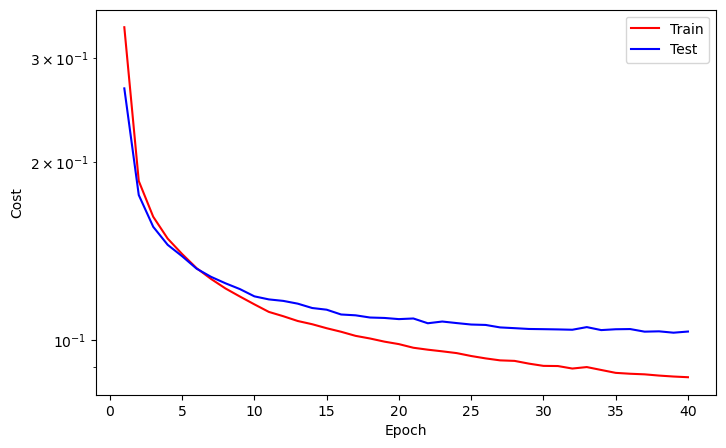

==> EarlyStop patience =  1 | Best test_cost: 0.1029


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch    41
Train_cost  = 0.0863 | Test_cost  = 0.1033 | 
==> EarlyStop patience =  2 | Best test_cost: 0.1029


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch    42
Train_cost  = 0.0857 | Test_cost  = 0.1029 | 


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch    43
Train_cost  = 0.0855 | Test_cost  = 0.1032 | 
==> EarlyStop patience =  1 | Best test_cost: 0.1029


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch    44
Train_cost  = 0.0849 | Test_cost  = 0.1033 | 
==> EarlyStop patience =  2 | Best test_cost: 0.1029


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch    45
Train_cost  = 0.0848 | Test_cost  = 0.1035 | 
==> EarlyStop patience =  3 | Best test_cost: 0.1029


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch    46
Train_cost  = 0.0848 | Test_cost  = 0.1038 | 
==> EarlyStop patience =  4 | Best test_cost: 0.1029


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch    47
Train_cost  = 0.0849 | Test_cost  = 0.1034 | 
==> EarlyStop patience =  5 | Best test_cost: 0.1029
==> Execute Early Stopping at epoch: 47 | Best test_cost: 0.1029
==> Best model is saved at model/dae


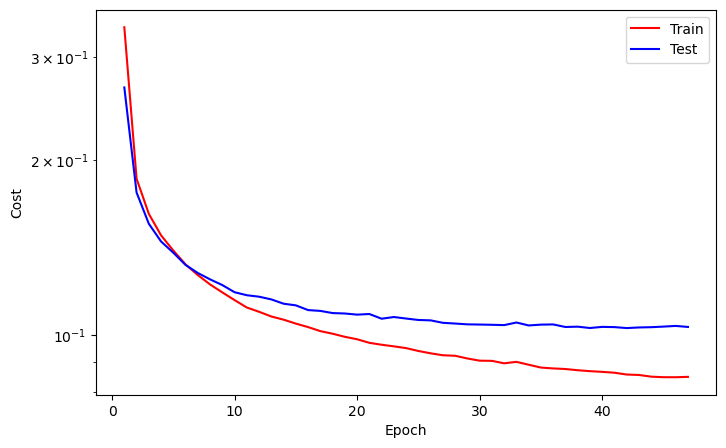

In [24]:
while True:
    train_cost = loop_fn("train", train_set, trainloader, model, criterion, optimizer, device)
    with torch.no_grad():
        test_cost = loop_fn("test", test_set, testloader, model, criterion, optimizer, device)
    
    # Logging
    callback.log(train_cost, test_cost)

    # Checkpoint
    callback.save_checkpoint()
        
    # Runtime Plotting
    callback.cost_runtime_plotting()
    
    # Early Stopping
    if callback.early_stopping(model, monitor="test_cost"):
        callback.plot_cost()
        break

# Evaluate

In [27]:
feature, target = next(iter(testloader))
feature = add_noise(feature).view(-1, 784).to(device)

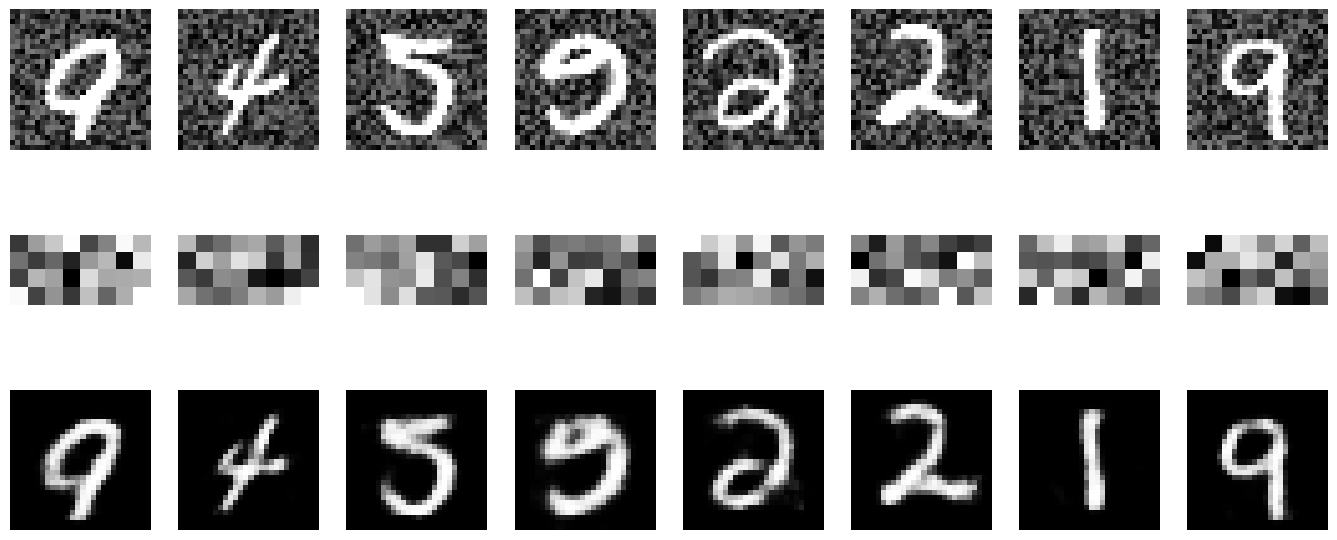

In [28]:
with torch.no_grad():
    model.eval()
    enc = model.encode(feature)
    dec = model.decode(enc)

fig, ax = plt.subplots(3, 8, figsize=(17, 7))
for i in range(8):
    ax[0, i].imshow(feature[i].view(28, 28).cpu(), cmap='gray')
    ax[0, i].axis('off')
    
    ax[1, i].imshow(enc[i].view(4, 8).cpu(), cmap='gray')
    ax[1, i].axis('off')
    
    ax[2, i].imshow(dec[i].view(28, 28).cpu(), cmap='gray')
    ax[2, i].axis('off')